In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx


## Project Objectives

The primary objective of this project is to develop a predictive model for loan approval decisions using a dataset of bank customers. By analyzing demographic and financial information, the model aims to accurately predict whether a loan application will be approved or denied. This project involves data exploration, preprocessing, feature engineering, and applying various machine learning algorithms to identify the most effective model. The final model will be evaluated and potentially deployed for practical use, offering valuable insights into the factors influencing loan approvals.

## Data Exploration
Let's start by loading the dataset and performing an initial exploration to understand its structure and content.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx',sheet_name =1)

# Display the first few rows
display(data.head())


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Summary statistics

In [3]:
display(data.describe())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Check for missing values

In [4]:
display(data.isnull().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Visualize Data Distributions:

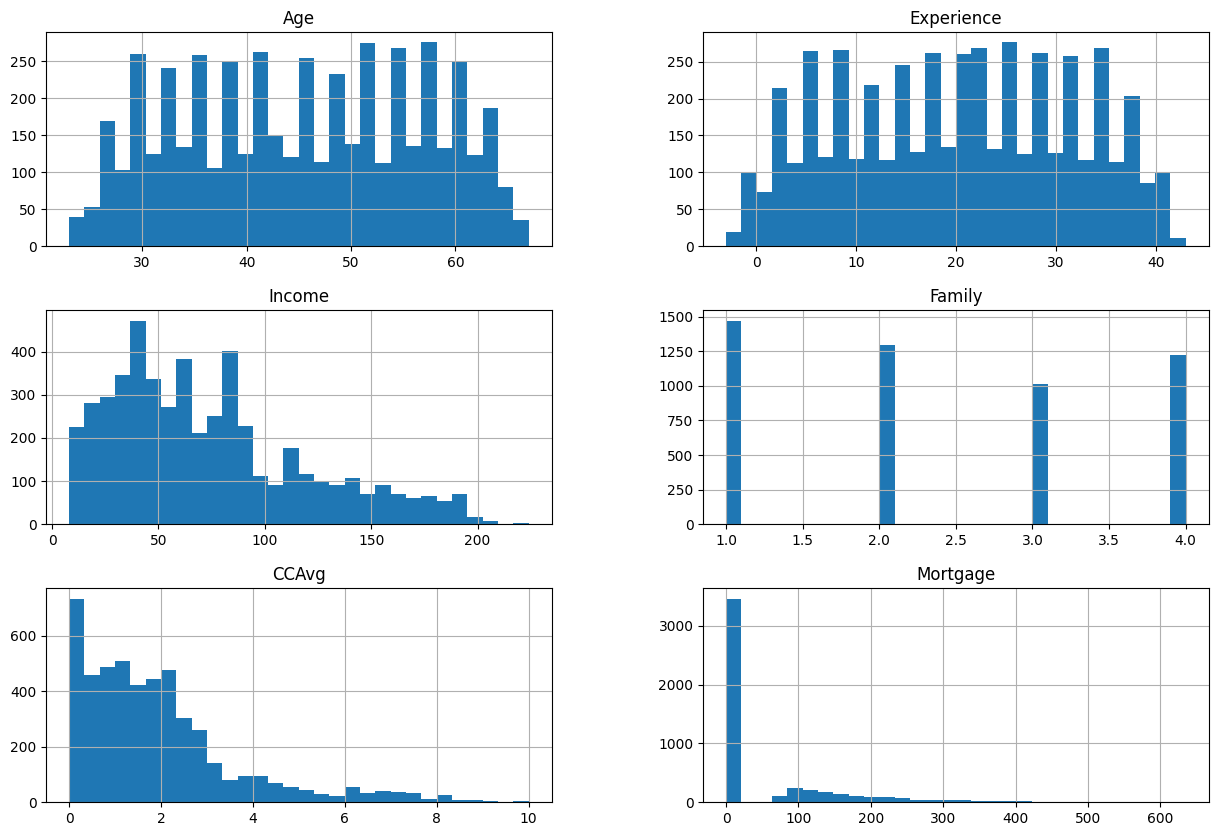

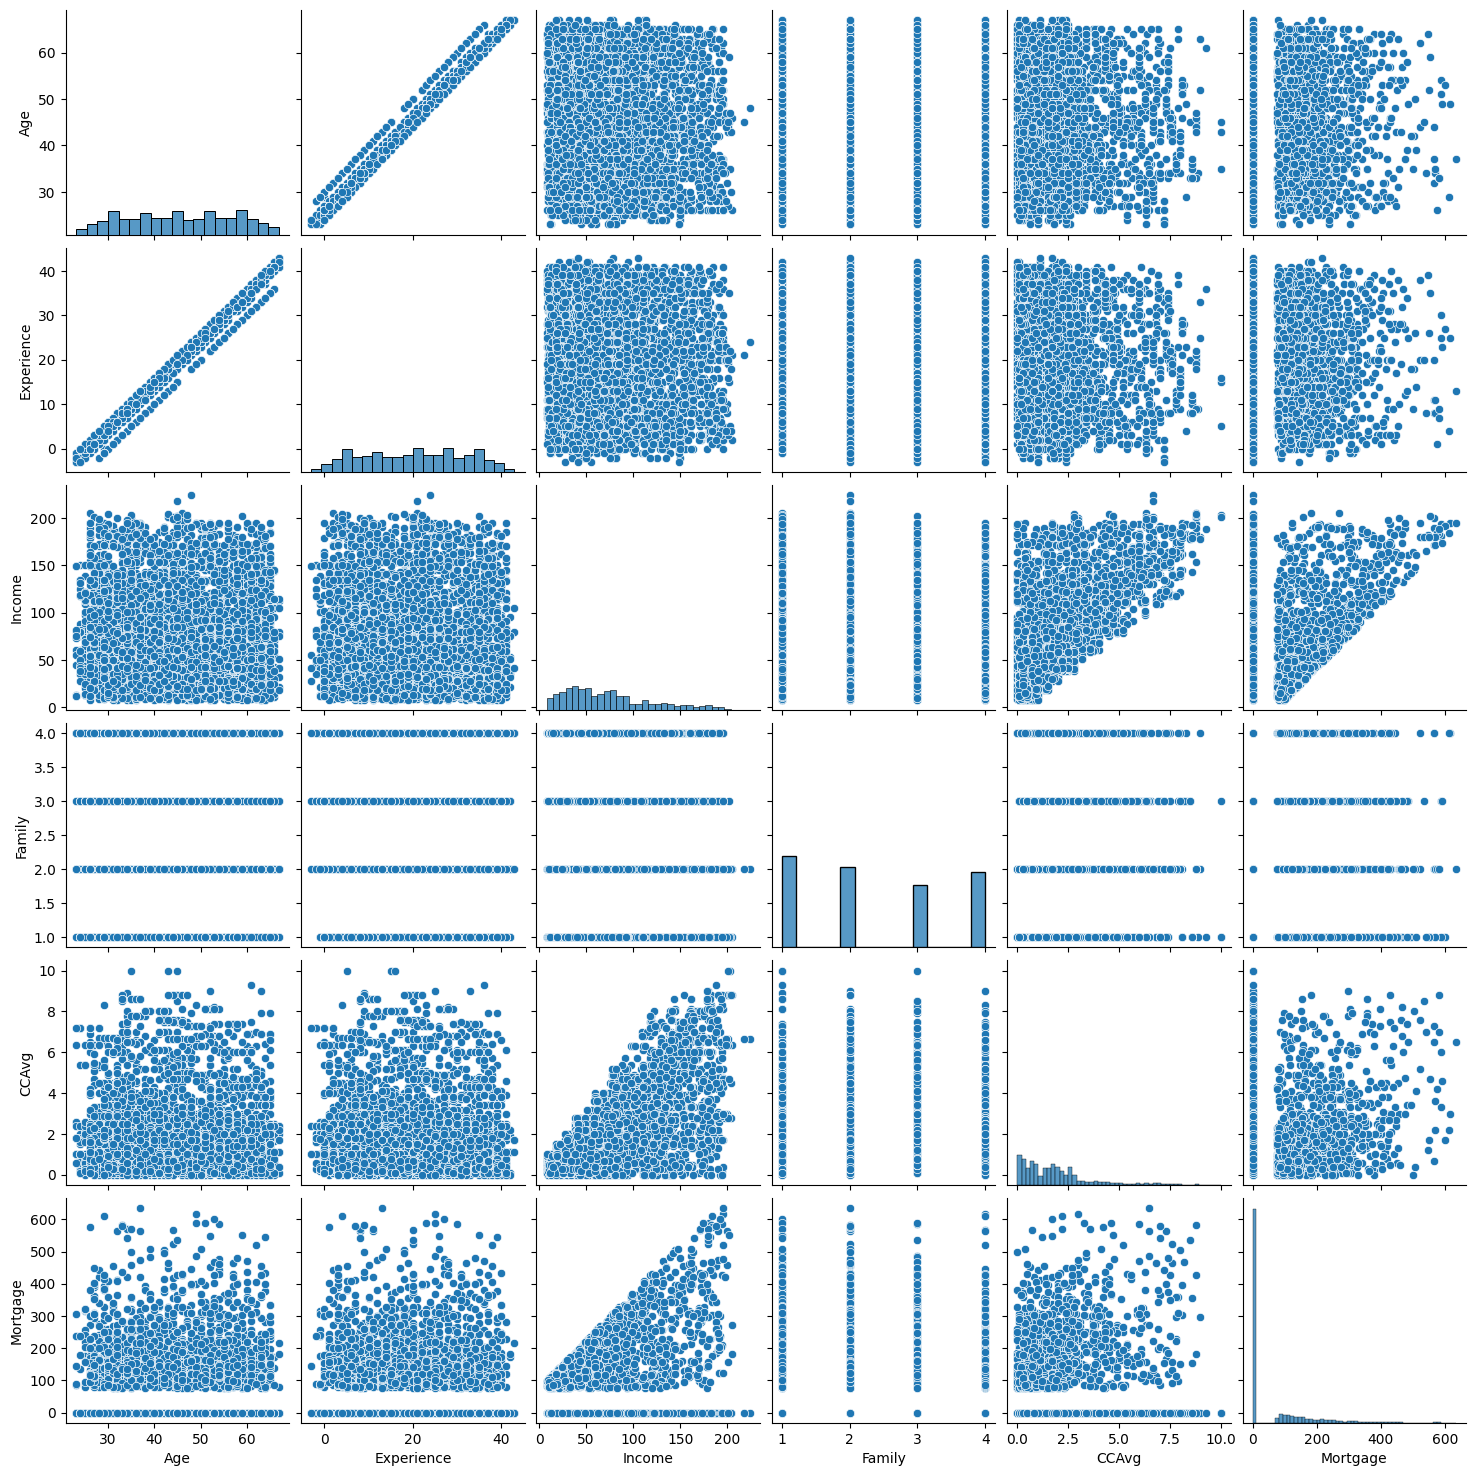

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['Age','Experience','Income','Family','CCAvg','Mortgage']
# Plot distributions of numerical features
data[numeric_features].hist(bins=30, figsize=(15, 10))
plt.show()

# Plot relationships between features
sns.pairplot(data[numeric_features])
plt.show()

### Inspect Categorical Variables:

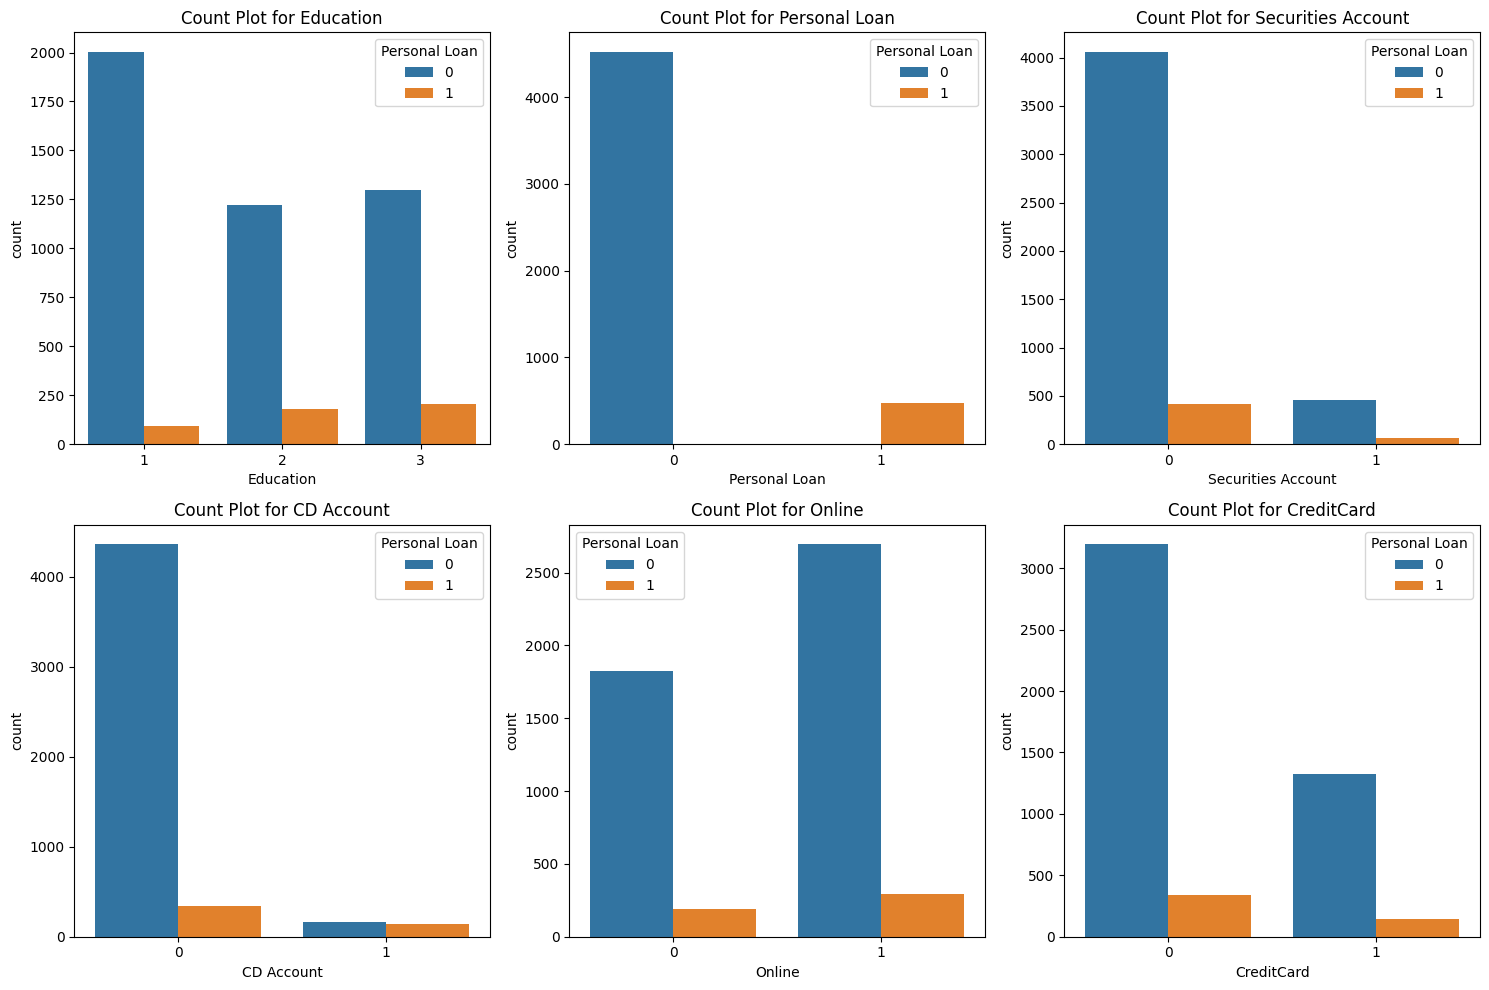

In [6]:
# Bar plot for categorical features
categorical_features = ['ZIP Code','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
temp = categorical_features.copy()
temp.remove('ZIP Code')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(temp):

    sns.countplot(ax=axes[i], x=feature, data=data, hue = 'Personal Loan')
    axes[i].set_title(f'Count Plot for {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Updated Observations from Data Exploration

1. **Numerical Features**:
   - **Age**: Some what Uniform distribution 
   - **Experience**: Similar to age, indicating potential correlation.
   - **Income**: Skewed to the right, with most customers earning less than 100.
   - **Family**: Distribution shows most customers have a family size between 1 and 4.
   - **CCAvg**: Skewed to the right, most values between 0 and 4.
   - **Mortgage**: Majority have no mortgage, few have high values.

2. **Pairplot Analysis**:
   - Strong correlation between Age and Experience.
   - Weak linear relationships between other features.

3. **Categorical Features**:
   - **Education**: Most customers have education level 1, fewer at level 3.
   - **Personal Loan**: Imbalanced, with fewer positive cases.
   - **Securities Account, CD Account, CreditCard**: Majority have no accounts.
   - **Online**: More customers use online services than not.

### Insights
- **Income, CCAvg, Mortgage**: These financial metrics show skewness, indicating possible need for transformation.


## Data Preprocessing
In this step, encode categorical variables, and scale numerical features.

In [7]:
# Performing one-hot encoding
categorical_features = ['ZIP Code','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
temp = categorical_features.copy()
temp.remove('ZIP Code')
temp.remove('Personal Loan')
data_encoded = pd.get_dummies(data, columns = temp)
data_encoded.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1,25,1,49,91107,4,1.6,0,0,True,False,False,False,True,True,False,True,False,True,False
1,2,45,19,34,90089,3,1.5,0,0,True,False,False,False,True,True,False,True,False,True,False
2,3,39,15,11,94720,1,1.0,0,0,True,False,False,True,False,True,False,True,False,True,False
3,4,35,9,100,94112,1,2.7,0,0,False,True,False,True,False,True,False,True,False,True,False
4,5,35,8,45,91330,4,1.0,0,0,False,True,False,True,False,True,False,True,False,False,True


In [8]:
# Apply log transformation to skewed features
data_encoded['Income'] = np.log1p(data['Income'])
data_encoded['CCAvg'] = np.log1p(data['CCAvg'])
data_encoded['Mortgage'] = np.log1p(data['Mortgage'])

In [9]:
from sklearn.preprocessing import StandardScaler
# Select the features to scale
features_to_scale = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(data_encoded[features_to_scale])

# Create a DataFrame with the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Drop the original features from the dataset
data.drop(columns=features_to_scale, inplace=True)

# Concatenate the scaled features with the original dataset
data_scaled = pd.concat([data, scaled_features_df], axis=1)

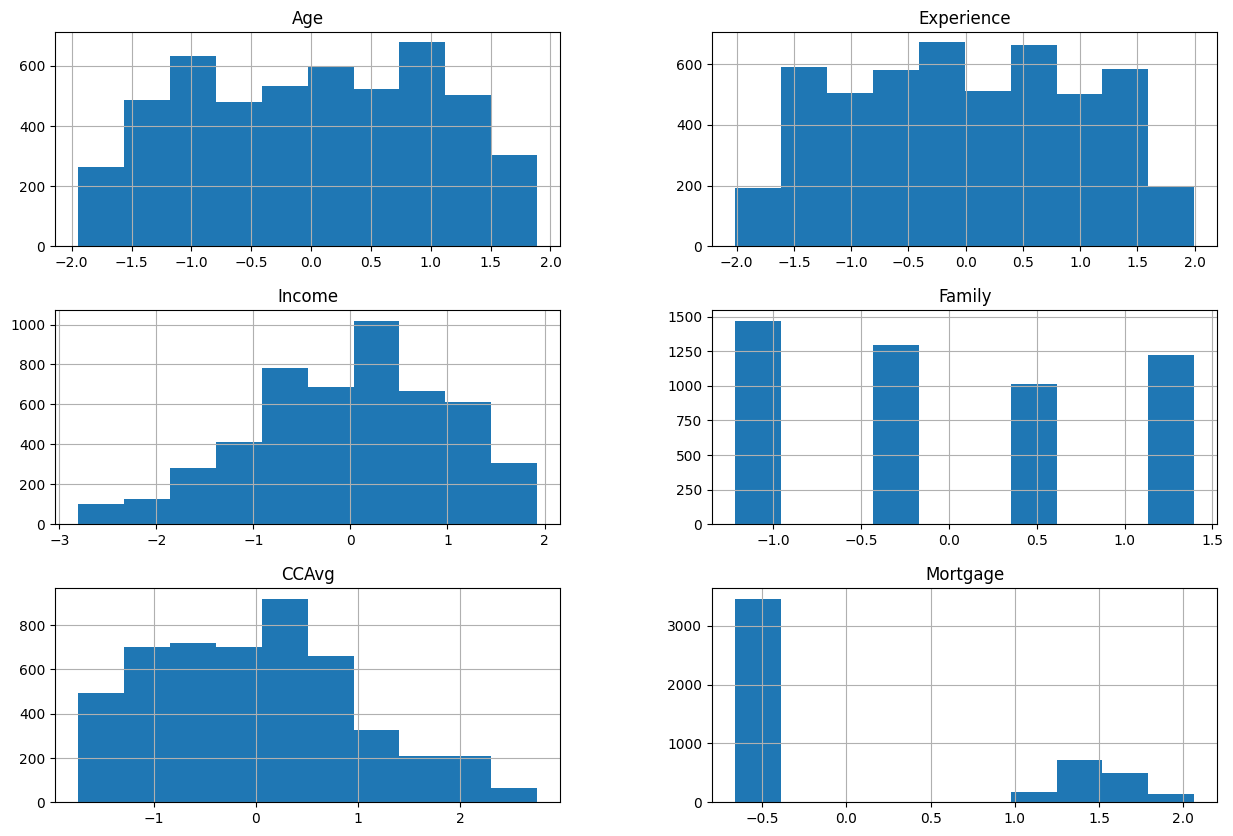

In [10]:
data_scaled[numeric_features].hist( figsize=(15, 10))
plt.show()

## Feature Engineering

keeping the first three integers in zip code

In [11]:
data_scaled['ZIP Code'].nunique()

467

In [12]:
data_scaled['ZIP Code short'] = data_encoded['ZIP Code'].copy()\
                    .astype(str).apply(lambda x: x[:3])


In [13]:
data_scaled['ZIP Code short'].nunique()

57

## Model 

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_excel('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx',sheet_name =1)

# Log transform skewed features
data['Income'] = np.log1p(data['Income'])
data['CCAvg'] = np.log1p(data['CCAvg'])
data['Mortgage'] = np.log1p(data['Mortgage'])

# Shorten ZIP Code to the first 3 digits
data['ZIP Code'] = data['ZIP Code'].astype(str).str[:3]

# Split into features and target
X = data.drop(columns=['Personal Loan', 'ID'])
y = data['Personal Loan']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Select the features to scale
features_to_scale = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Perform one-hot encoding on categorical features
X_train = pd.get_dummies(X_train, columns=['ZIP Code', 'Education'])
X_val = pd.get_dummies(X_val, columns=['ZIP Code', 'Education'])
X_test = pd.get_dummies(X_test, columns=['ZIP Code', 'Education'])

# Ensure that the validation and test sets have the same dummy variables as the training set
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_val)
    
    results[model_name] = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred)
    }

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.942,0.699187,0.803738,0.747826
Decision Tree,0.979,0.883929,0.925234,0.904110
Random Forest,0.989,0.936364,0.962617,0.949309
SVM,0.977,0.920000,0.859813,0.888889
Gradient Boosting,0.983,0.909091,0.934579,0.921659


## Hyperparameter Tuning